In [ ]:
pip install -U dataprep

In [ ]:
pip install sweetviz

In [ ]:
pip install tensorflow_data_validation

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import sweetviz as sv

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
df = pd.read_parquet('/content/drive/MyDrive/mypackage1/yellow_tripdata_2020-03.parquet')
df.to_csv('yellow_tripdata_2020-03.csv')
df2 = pd.read_parquet('/content/drive/MyDrive/mypackage1/yellow_tripdata_2020-01.parquet')
df2.to_csv('yellow_tripdata_2020-01.csv')

In [7]:
print(df.shape)
print(df2.shape)

(3007687, 19)
(6405008, 19)


In [8]:
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2020-03-01 00:31:13,2020-03-01 01:01:42,1.0,4.70,1.0,N,88,255,1,22.00,3.0,0.5,2.00,0.0,0.3,27.80,2.5,None
1,2,2020-03-01 00:08:22,2020-03-01 00:08:49,1.0,0.00,1.0,N,193,193,2,2.50,0.5,0.5,0.00,0.0,0.3,3.80,0.0,None
2,1,2020-03-01 00:52:18,2020-03-01 00:59:16,1.0,1.10,1.0,N,246,90,1,6.00,3.0,0.5,1.95,0.0,0.3,11.75,2.5,None
3,2,2020-03-01 00:47:53,2020-03-01 00:50:57,2.0,0.87,1.0,N,151,238,1,5.00,0.5,0.5,1.76,0.0,0.3,10.56,2.5,None
4,1,2020-03-01 00:43:19,2020-03-01 00:58:27,0.0,4.40,1.0,N,79,261,1,16.50,3.0,0.5,4.05,0.0,0.3,24.35,2.5,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3007682,2,2020-03-31 23:21:00,2020-03-31 23:33:00,NaN,5.43,NaN,None,137,87,0,30.47,0.0,0.5,0.00,0.0,0.3,33.77,NaN,None
3007683,2,2020-03-31 23:57:00,2020-04-01 00:26:00,NaN,13.21,NaN,None,137,71,0,37.97,0.0,0.5,0.00,0.0,0.3,41.27,NaN,None
3007684,2,2020-03-31 23:22:01,2020-03-31 23:43:52,NaN,12.14,NaN,None,137,32,0,37.10,0.0,0.0,0.00,0.0,0.3,39.90,NaN,None
3007685,2,2020-03-31 23:18:53,2020-03-31 23:32:21,NaN,7.01,NaN,None,137,159,0,20.07,0.0,0.0,0.00,0.0,0.3,22.87,NaN,None


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorID,3007687.0,1.671989,0.472886,1.00,1.00,2.00,2.00,6.00
passenger_count,2969879.0,1.467477,1.120087,0.00,1.00,1.00,1.00,9.00
trip_distance,3007687.0,3.117041,206.920728,0.00,1.00,1.67,3.02,269803.73
RatecodeID,2969879.0,1.051377,0.710921,1.00,1.00,1.00,1.00,99.00
PULocationID,3007687.0,163.429781,66.586537,1.00,114.00,162.00,234.00,265.00
DOLocationID,3007687.0,160.933627,70.741316,1.00,107.00,162.00,234.00,265.00
payment_type,3007687.0,1.251811,0.494120,0.00,1.00,1.00,2.00,4.00
fare_amount,3007687.0,12.697643,387.129705,-1259.00,6.50,9.00,14.00,671100.14
extra,3007687.0,1.246796,288.308527,-7.00,0.00,0.50,2.50,500000.80
mta_tax,3007687.0,0.658038,288.306018,-0.50,0.50,0.50,0.50,500000.50


# New Section

In [10]:
df.payment_type.value_counts()

1    2211073
2     732096
0      37808
3      17048
4       9662
Name: payment_type, dtype: int64

In [11]:
df.isnull().sum()

VendorID                       0
tpep_pickup_datetime           0
tpep_dropoff_datetime          0
passenger_count            37808
trip_distance                  0
RatecodeID                 37808
store_and_fwd_flag         37808
PULocationID                   0
DOLocationID                   0
payment_type                   0
fare_amount                    0
extra                          0
mta_tax                        0
tip_amount                     0
tolls_amount                   0
improvement_surcharge          0
total_amount                   0
congestion_surcharge       37808
airport_fee              3007687
dtype: int64


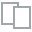
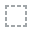
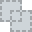
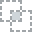
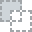
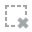
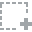
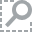
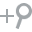
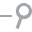
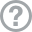
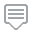
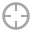
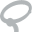
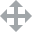
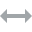
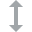
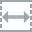
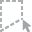
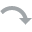
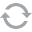
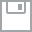
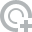
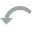
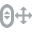
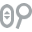
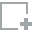
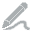
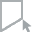
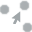
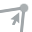
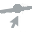

In [12]:
from dataprep.eda import plot_missing
plot_missing(df)


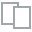
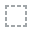
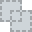
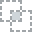
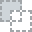
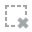
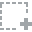
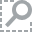
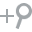
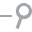
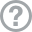
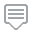
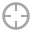
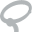
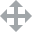
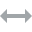
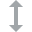
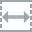
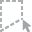
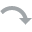
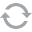
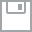
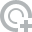
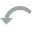
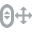
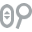
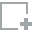
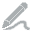
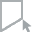
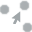
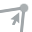
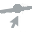

In [13]:
from dataprep.eda import plot_missing
plot_missing(df2)

In [14]:
df['Dates'] = pd.to_datetime(df['tpep_pickup_datetime']).dt.date
df2['Dates'] = pd.to_datetime(df2['tpep_pickup_datetime']).dt.date

In [15]:
df.Dates.value_counts()

2020-03-05    244448
2020-03-06    243741
2020-03-04    229734
2020-03-03    222917
2020-03-07    208190
2020-03-02    193514
2020-03-10    184110
2020-03-11    182663
2020-03-01    179760
2020-03-09    175594
2020-03-12    171096
2020-03-08    165787
2020-03-13    134723
2020-03-14     89672
2020-03-16     64226
2020-03-15     59894
2020-03-17     45639
2020-03-18     36266
2020-03-19     29813
2020-03-20     27644
2020-03-21     16177
2020-03-23     13580
2020-03-24     11858
2020-03-27     11785
2020-03-25     11211
2020-03-26     10669
2020-03-22     10341
2020-03-30      9586
2020-03-31      9447
2020-03-28      7635
2020-03-29      5541
2020-02-29       271
2020-01-30        21
2020-02-01        19
2020-01-28        18
2020-01-31        15
2020-02-02        13
2009-01-01        12
2020-01-29        10
2020-01-27         5
2008-12-31         5
2020-04-21         5
2020-04-25         4
2020-06-07         4
2020-06-03         4
2020-06-24         3
2020-04-04         3
2020-06-28   

In [16]:
df['Dates'] = df['Dates'].astype(str)
df2['Dates'] = df2['Dates'].astype(str)

In [17]:
df=df[(df['Dates']>='2020-03-01')&(df['Dates']<='2020-03-31')]
df2=df2[(df2['Dates']>='2020-01-01')&(df2['Dates']<='2020-01-31')]

In [18]:
df['PickupDay']=df['tpep_pickup_datetime'].dt.day_name()
df['DropOffDay']=df['tpep_dropoff_datetime'].dt.day_name()

df2['PickupDay']=df2['tpep_pickup_datetime'].dt.day_name()
df2['DropOffDay']=df2['tpep_dropoff_datetime'].dt.day_name()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [19]:
df['datehour'] = df['tpep_pickup_datetime'].dt.hour
df2['datehour'] = df2['tpep_pickup_datetime'].dt.hour

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [20]:
def f(x):
    if (x > 4) and (x <= 8):
        return 'Early Morning'
    elif (x > 8) and (x <= 12 ):
        return 'Morning'
    elif (x > 12) and (x <= 16):
        return'Noon'
    elif (x > 16) and (x <= 20) :
        return 'Eve'
    elif (x > 20) and (x <= 24):
        return'Night'
    elif (x <= 4):
        return'Late Night'

In [21]:
df['Periods'] = df['datehour'].apply(f)
df2['Periods'] = df2['datehour'].apply(f)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [22]:
df= df.drop(columns="datehour")
df= df.drop(columns="Dates")

df2= df2.drop(columns="datehour")
df2= df2.drop(columns="Dates")

In [23]:
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,PickupDay,DropOffDay,Periods
0,1,2020-03-01 00:31:13,2020-03-01 01:01:42,1.0,4.70,1.0,N,88,255,1,...,0.5,2.00,0.0,0.3,27.80,2.5,<NA>,Sunday,Sunday,Late Night
1,2,2020-03-01 00:08:22,2020-03-01 00:08:49,1.0,0.00,1.0,N,193,193,2,...,0.5,0.00,0.0,0.3,3.80,0.0,<NA>,Sunday,Sunday,Late Night
2,1,2020-03-01 00:52:18,2020-03-01 00:59:16,1.0,1.10,1.0,N,246,90,1,...,0.5,1.95,0.0,0.3,11.75,2.5,<NA>,Sunday,Sunday,Late Night
3,2,2020-03-01 00:47:53,2020-03-01 00:50:57,2.0,0.87,1.0,N,151,238,1,...,0.5,1.76,0.0,0.3,10.56,2.5,<NA>,Sunday,Sunday,Late Night
4,1,2020-03-01 00:43:19,2020-03-01 00:58:27,0.0,4.40,1.0,N,79,261,1,...,0.5,4.05,0.0,0.3,24.35,2.5,<NA>,Sunday,Sunday,Late Night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3007682,2,2020-03-31 23:21:00,2020-03-31 23:33:00,NaN,5.43,NaN,None,137,87,0,...,0.5,0.00,0.0,0.3,33.77,NaN,None,Tuesday,Tuesday,Night
3007683,2,2020-03-31 23:57:00,2020-04-01 00:26:00,NaN,13.21,NaN,None,137,71,0,...,0.5,0.00,0.0,0.3,41.27,NaN,None,Tuesday,Wednesday,Night
3007684,2,2020-03-31 23:22:01,2020-03-31 23:43:52,NaN,12.14,NaN,None,137,32,0,...,0.0,0.00,0.0,0.3,39.90,NaN,None,Tuesday,Tuesday,Night
3007685,2,2020-03-31 23:18:53,2020-03-31 23:32:21,NaN,7.01,NaN,None,137,159,0,...,0.0,0.00,0.0,0.3,22.87,NaN,None,Tuesday,Tuesday,Night


In [24]:
df['RatecodeID']=df['RatecodeID'].fillna(method='ffill')
df['passenger_count']=df['passenger_count'].fillna(method='ffill')
df['congestion_surcharge']=df['congestion_surcharge'].fillna(method='ffill')
df['store_and_fwd_flag']=df['store_and_fwd_flag'].fillna(method='ffill')

df2['RatecodeID']=df2['RatecodeID'].fillna(method='ffill')
df2['passenger_count']=df2['passenger_count'].fillna(method='ffill')
df2['congestion_surcharge']=df2['congestion_surcharge'].fillna(method='ffill')
df2['store_and_fwd_flag']=df2['store_and_fwd_flag'].fillna(method='ffill')

In [25]:
df.isnull().sum()

VendorID                       0
tpep_pickup_datetime           0
tpep_dropoff_datetime          0
passenger_count                0
trip_distance                  0
RatecodeID                     0
store_and_fwd_flag             0
PULocationID                   0
DOLocationID                   0
payment_type                   0
fare_amount                    0
extra                          0
mta_tax                        0
tip_amount                     0
tolls_amount                   0
improvement_surcharge          0
total_amount                   0
congestion_surcharge           0
airport_fee              3007261
PickupDay                      0
DropOffDay                     0
Periods                        0
dtype: int64

In [26]:
df.store_and_fwd_flag.value_counts()

N    2979280
Y      27981
Name: store_and_fwd_flag, dtype: int64

In [27]:
df.store_and_fwd_flag.unique()

array(['N', 'Y'], dtype=object)

In [28]:
df.store_and_fwd_flag.value_counts()

N    2979280
Y      27981
Name: store_and_fwd_flag, dtype: int64

In [29]:
df= df.drop(columns="airport_fee")
df2= df2.drop(columns="airport_fee")

In [30]:
df.isnull().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
PickupDay                0
DropOffDay               0
Periods                  0
dtype: int64

In [31]:
df['trip_duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.seconds/60
df2['trip_duration'] = (df2['tpep_dropoff_datetime'] - df2['tpep_pickup_datetime']).dt.seconds/60

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3007261 entries, 0 to 3007686
Data columns (total 22 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  PickupDay             

In [33]:
df.VendorID.value_counts()

2    2018292
1     988484
6        476
5          9
Name: VendorID, dtype: int64

In [34]:
df.RatecodeID.value_counts()

1.0     2924235
2.0       58962
5.0       15847
3.0        5854
4.0        2228
99.0        120
6.0          15
Name: RatecodeID, dtype: int64

In [35]:
df.payment_type.value_counts()

1    2210750
2     731994
0      37808
3      17047
4       9662
Name: payment_type, dtype: int64

In [36]:
df.shape

(3007261, 22)

In [37]:
df=df.drop(df[(df['payment_type'] == 0)].index)
df2=df2.drop(df2[(df2['payment_type'] == 0)].index)

In [38]:
index=df[(df['VendorID'] == 6) | (df['VendorID'] == 5)].index
df.drop(index,inplace=True)

index=df2[(df2['VendorID'] == 6) | (df2['VendorID'] == 5)].index
df2.drop(index,inplace=True)

In [39]:
df.VendorID.value_counts()

2    1981152
1     988301
Name: VendorID, dtype: int64

In [40]:
df=df.drop(df[(df['RatecodeID'] == 99)].index)
df2=df2.drop(df2[(df2['RatecodeID'] == 99)].index)

In [41]:
df.RatecodeID.value_counts()

1.0    2886427
2.0      58962
5.0      15847
3.0       5854
4.0       2228
6.0         15
Name: RatecodeID, dtype: int64

In [42]:
df.isnull().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
PickupDay                0
DropOffDay               0
Periods                  0
trip_duration            0
dtype: int64

In [43]:
df.store_and_fwd_flag.unique()

array(['N', 'Y'], dtype=object)

In [44]:
df['store_and_fwd_flag']=df['store_and_fwd_flag'].replace({'N': 0, 'Y': 1})
df2['store_and_fwd_flag']=df2['store_and_fwd_flag'].replace({'N': 0, 'Y': 1})

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2969333 entries, 0 to 2969878
Data columns (total 22 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     int64         
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  PickupDay             

In [46]:
df.shape

(2969333, 22)

In [47]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorID,2969333.0,1.667170,0.471226,1.00,1.000000,2.00,2.00,2.000000
passenger_count,2969333.0,1.467467,1.120063,0.00,1.000000,1.00,1.00,9.000000
trip_distance,2969333.0,2.822310,3.613218,0.00,0.990000,1.64,2.98,310.900000
RatecodeID,2969333.0,1.047424,0.343167,1.00,1.000000,1.00,1.00,6.000000
store_and_fwd_flag,2969333.0,0.009421,0.096605,0.00,0.000000,0.00,0.00,1.000000
PULocationID,2969333.0,163.761925,66.402642,1.00,114.000000,162.00,234.00,265.000000
DOLocationID,2969333.0,161.329018,70.595629,1.00,107.000000,162.00,234.00,265.000000
payment_type,2969333.0,1.267726,0.476499,1.00,1.000000,1.00,2.00,4.000000
fare_amount,2969333.0,12.547285,389.616122,-1259.00,6.500000,9.00,13.50,671100.140000
extra,2969333.0,1.092724,1.245593,-7.00,0.000000,0.50,2.50,30.300000


In [48]:
df=df[(df['PULocationID']>1) & (df['PULocationID']<264)]
df=df[(df['PULocationID']>1) & (df['PULocationID']<264)]
df=df[(df['DOLocationID']>1) & (df['DOLocationID']<264)]
df=df[(df['trip_distance']>0)]
df=df[(df['fare_amount']>=2.5)]
df=df[(df['passenger_count']>0) & (df['passenger_count']<7)]

df2=df2[(df2['PULocationID']>1) & (df2['PULocationID']<264)]
df2=df2[(df2['PULocationID']>1) & (df2['PULocationID']<264)]
df2=df2[(df2['DOLocationID']>1) & (df2['DOLocationID']<264)]
df2=df2[(df2['trip_distance']>0)]
df2=df2[(df2['fare_amount']>=2.5)]
df2=df2[(df2['passenger_count']>0) & (df2['passenger_count']<7)]


In [49]:
df.shape

(2835813, 22)

In [50]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorID,2835813.0,1.683255,0.465207,1.00,1.00,2.00,2.000000,2.000000
passenger_count,2835813.0,1.502502,1.114831,1.00,1.00,1.00,1.000000,6.000000
trip_distance,2835813.0,2.800930,3.437191,0.01,1.00,1.67,2.990000,226.600000
RatecodeID,2835813.0,1.024881,0.201671,1.00,1.00,1.00,1.000000,6.000000
store_and_fwd_flag,2835813.0,0.008551,0.092077,0.00,0.00,0.00,0.000000,1.000000
PULocationID,2835813.0,163.309647,66.072523,2.00,114.00,162.00,233.000000,263.000000
DOLocationID,2835813.0,160.939976,70.001154,2.00,107.00,162.00,234.000000,263.000000
payment_type,2835813.0,1.257233,0.453531,1.00,1.00,1.00,2.000000,4.000000
fare_amount,2835813.0,12.276181,398.632692,2.50,6.50,9.00,13.500000,671100.140000
extra,2835813.0,1.074896,1.231951,-0.50,0.00,0.50,2.500000,30.300000


In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

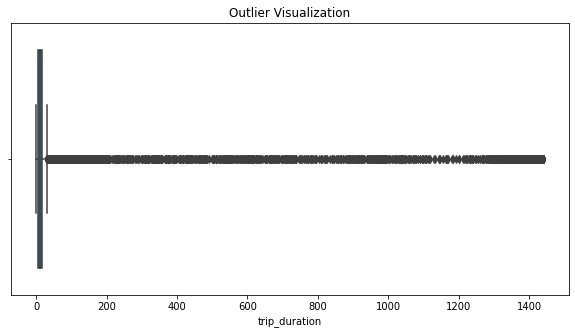

In [52]:
plt.figure(figsize=(10,5))
plt.title("Outlier Visualization")
sns.boxplot(x=df.trip_duration)

In [53]:
df=df[(df['trip_duration']<440)&(df['trip_duration']>0)]
df2=df2[(df2['trip_duration']<440)&(df2['trip_duration']>0)]

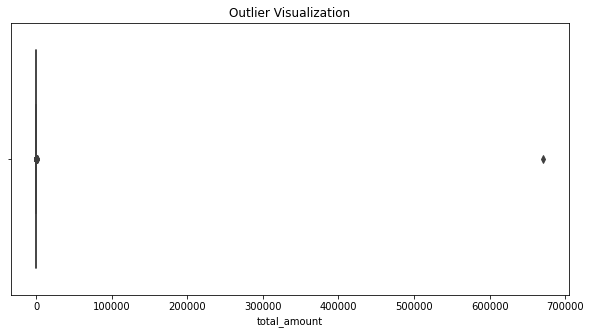

In [54]:
plt.figure(figsize=(10,5))
plt.title("Outlier Visualization")
sns.boxplot(x=df.total_amount)

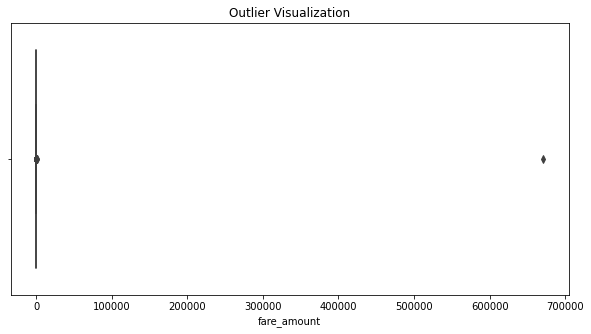

In [55]:
plt.figure(figsize=(10,5))
plt.title("Outlier Visualization")
sns.boxplot(x=df.fare_amount)

In [56]:
df=df[(df['fare_amount']<250) & (df['fare_amount']>0)]
df2=df2[(df2['fare_amount']<250) & (df2['fare_amount']>0)]

In [57]:
df2['fare_amount'].nlargest(200)

5782492    248.5
2734381    247.0
3298732    238.5
1575151    237.0
2176613    236.5
           ...  
3968648    115.0
3137637    114.5
1086666    114.0
1529366    113.5
3676990    113.5
Name: fare_amount, Length: 200, dtype: float64

In [58]:
df=df[(df['total_amount']<df['total_amount'].max()) & (df['total_amount']>0)]
df2=df2[(df2['total_amount']<=300) & (df2['total_amount']>0)]

In [59]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorID,2830280.0,1.682656,0.465442,1.000000,1.000000,2.000000,2.000000,2.000000
passenger_count,2830280.0,1.501817,1.113929,1.000000,1.000000,1.000000,1.000000,6.000000
trip_distance,2830280.0,2.798104,3.422887,0.010000,1.000000,1.670000,2.980000,86.400000
RatecodeID,2830280.0,1.024805,0.201282,1.000000,1.000000,1.000000,1.000000,6.000000
store_and_fwd_flag,2830280.0,0.008568,0.092165,0.000000,0.000000,0.000000,0.000000,1.000000
PULocationID,2830280.0,163.320049,66.072516,2.000000,114.000000,162.000000,233.000000,263.000000
DOLocationID,2830280.0,160.949160,69.997562,2.000000,107.000000,162.000000,234.000000,263.000000
payment_type,2830280.0,1.257131,0.453497,1.000000,1.000000,1.000000,2.000000,4.000000
fare_amount,2830280.0,12.028450,9.720047,2.500000,6.500000,9.000000,13.500000,248.000000
extra,2830280.0,1.076275,1.232473,-0.500000,0.000000,0.500000,2.500000,30.300000


In [59]:
df.shape

(2830280, 22)

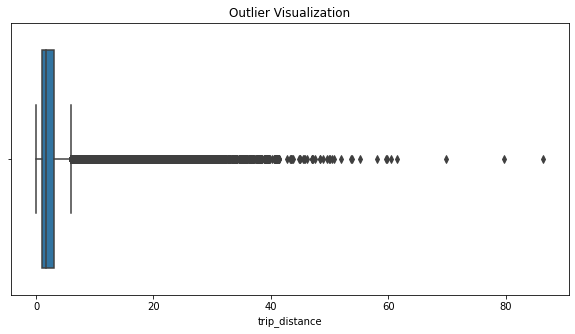

In [60]:
plt.figure(figsize=(10,5))
plt.title("Outlier Visualization")
sns.boxplot(x=df.trip_distance)

In [61]:
df=df[(df['trip_distance']<=150) & (df['trip_distance']>0)]
df2=df2[(df2['trip_distance']<=150) & (df2['trip_distance']>0)]

In [62]:
print(df['fare_amount'].nlargest(200))

2659844    248.0
883726     240.0
2715532    235.0
837562     227.0
2500153    222.5
           ...  
2624323    104.5
2796882    104.5
2964140    104.5
240233     104.0
908495     104.0
Name: fare_amount, Length: 200, dtype: float64


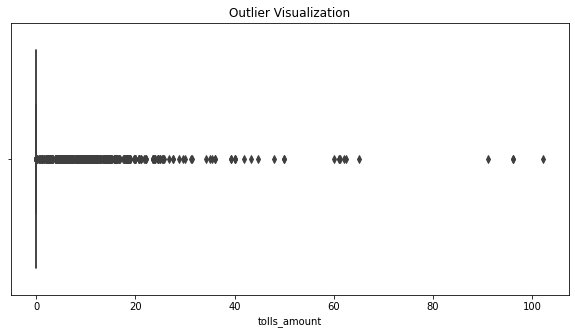

In [65]:
plt.figure(figsize=(10,5))
plt.title("Outlier Visualization")
sns.boxplot(x=df.tolls_amount)

In [66]:
df=df[(df['tolls_amount']<=25)]
df2=df2[(df2['tolls_amount']<=df2['tolls_amount'].quantile(0.999)) & (df2['tolls_amount']>=df2['tolls_amount'].quantile(0.001))]

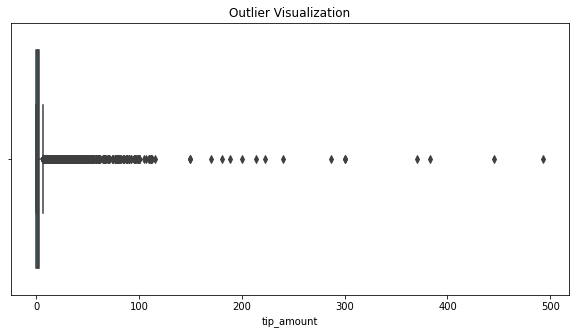

In [67]:
plt.figure(figsize=(10,5))
plt.title("Outlier Visualization")
sns.boxplot(x=df.tip_amount)

In [68]:
df=df[(df['tip_amount']<=50)]
df2=df2[(df2['tip_amount']<=df2['tip_amount'].quantile(0.999)) & (df2['tip_amount']>=df2['tip_amount'].quantile(0.001))]

In [69]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorID,2830076.0,1.682651,0.465445,1.000000,1.000000,2.000000,2.000000,2.000000
passenger_count,2830076.0,1.501814,1.113921,1.000000,1.000000,1.000000,1.000000,6.000000
trip_distance,2830076.0,2.797671,3.421521,0.010000,1.000000,1.670000,2.980000,86.400000
RatecodeID,2830076.0,1.024787,0.201195,1.000000,1.000000,1.000000,1.000000,6.000000
store_and_fwd_flag,2830076.0,0.008568,0.092168,0.000000,0.000000,0.000000,0.000000,1.000000
PULocationID,2830076.0,163.321314,66.072367,2.000000,114.000000,162.000000,233.000000,263.000000
DOLocationID,2830076.0,160.949861,69.997502,2.000000,107.000000,162.000000,234.000000,263.000000
payment_type,2830076.0,1.257142,0.453494,1.000000,1.000000,1.000000,2.000000,4.000000
fare_amount,2830076.0,12.026971,9.714259,2.500000,6.500000,9.000000,13.500000,248.000000
extra,2830076.0,1.076289,1.232462,-0.500000,0.000000,0.500000,2.500000,30.300000


In [70]:
df.shape

(2830076, 22)

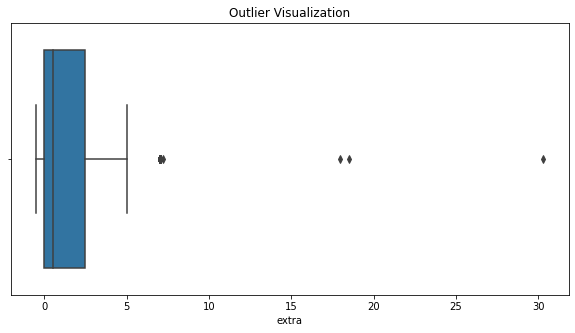

In [71]:
plt.figure(figsize=(10,5))
plt.title("Outlier Visualization")
sns.boxplot(x=df.extra)

In [72]:
df=df[(df['extra']<=6)]
df2=df2[(df2['extra']<=df2['extra'].quantile(0.999)) & (df2['extra']>=df2['extra'].quantile(0.001))]

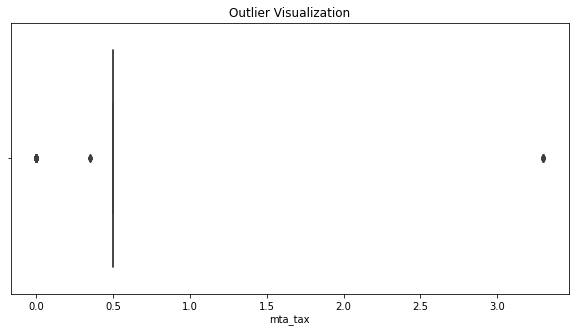

In [73]:
plt.figure(figsize=(10,5))
plt.title("Outlier Visualization")
sns.boxplot(x=df.mta_tax)

In [74]:
df=df[(df['mta_tax']<=df['mta_tax'].quantile(0.999)) & (df['mta_tax']>=df['mta_tax'].quantile(0.001))]
df2=df2[(df2['mta_tax']<=df2['mta_tax'].quantile(0.999)) & (df2['mta_tax']>=df2['mta_tax'].quantile(0.001))]

In [75]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorID,2827406.0,1.683290,0.465193,1.000000,1.000000,2.000000,2.000000,2.000000
passenger_count,2827406.0,1.501877,1.114227,1.000000,1.000000,1.000000,1.000000,6.000000
trip_distance,2827406.0,2.783932,3.391658,0.010000,1.000000,1.660000,2.970000,86.400000
RatecodeID,2827406.0,1.023874,0.199063,1.000000,1.000000,1.000000,1.000000,6.000000
store_and_fwd_flag,2827406.0,0.008549,0.092066,0.000000,0.000000,0.000000,0.000000,1.000000
PULocationID,2827406.0,163.338151,66.085656,2.000000,114.000000,162.000000,233.000000,263.000000
DOLocationID,2827406.0,160.957778,70.008999,2.000000,107.000000,162.000000,234.000000,263.000000
payment_type,2827406.0,1.257143,0.453453,1.000000,1.000000,1.000000,2.000000,4.000000
fare_amount,2827406.0,11.989189,9.640062,2.500000,6.500000,9.000000,13.500000,248.000000
extra,2827406.0,1.070698,1.219365,-0.500000,0.000000,0.500000,2.500000,5.000000


In [76]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorID,6051362.0,1.682717,0.465419,1.000000,1.000000,2.00,2.00,2.000000
passenger_count,6051362.0,1.545540,1.146183,1.000000,1.000000,1.00,2.00,6.000000
trip_distance,6051362.0,2.799992,3.534434,0.010000,0.980000,1.60,2.89,91.410000
RatecodeID,6051362.0,1.029199,0.211882,1.000000,1.000000,1.00,1.00,6.000000
store_and_fwd_flag,6051362.0,0.009947,0.099238,0.000000,0.000000,0.00,0.00,1.000000
PULocationID,6051362.0,164.568845,65.065750,2.000000,132.000000,162.00,233.00,263.000000
DOLocationID,6051362.0,162.616546,69.147351,2.000000,113.000000,162.00,234.00,263.000000
payment_type,6051362.0,1.261266,0.454571,1.000000,1.000000,1.00,2.00,4.000000
fare_amount,6051362.0,12.074850,9.937634,2.500000,6.500000,9.00,13.50,247.000000
extra,6051362.0,1.086728,1.238983,0.000000,0.000000,0.50,2.50,7.000000


In [77]:
print(df.shape)
print(df2.shape)

(2827406, 22)
(6051362, 22)


In [78]:
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,PickupDay,DropOffDay,Periods,trip_duration
0,1,2020-03-01 00:31:13,2020-03-01 01:01:42,1.0,4.70,1.0,0,88,255,1,...,0.5,2.00,0.0,0.3,27.80,2.5,Sunday,Sunday,Late Night,30.483333
2,1,2020-03-01 00:52:18,2020-03-01 00:59:16,1.0,1.10,1.0,0,246,90,1,...,0.5,1.95,0.0,0.3,11.75,2.5,Sunday,Sunday,Late Night,6.966667
3,2,2020-03-01 00:47:53,2020-03-01 00:50:57,2.0,0.87,1.0,0,151,238,1,...,0.5,1.76,0.0,0.3,10.56,2.5,Sunday,Sunday,Late Night,3.066667
5,1,2020-03-01 00:04:43,2020-03-01 00:23:17,1.0,3.50,1.0,1,113,142,1,...,0.5,3.75,0.0,0.3,22.55,2.5,Sunday,Sunday,Late Night,18.566667
6,1,2020-03-01 00:43:21,2020-03-01 01:14:36,1.0,14.10,1.0,1,237,14,1,...,0.5,8.85,0.0,0.3,53.15,2.5,Sunday,Sunday,Late Night,31.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2969874,2,2020-03-31 23:18:36,2020-03-31 23:21:26,5.0,0.52,1.0,0,236,236,2,...,0.5,0.00,0.0,0.3,7.80,2.5,Tuesday,Tuesday,Night,2.833333
2969875,2,2020-03-31 23:39:18,2020-03-31 23:50:17,5.0,2.35,1.0,0,263,166,1,...,0.5,2.86,0.0,0.3,17.16,2.5,Tuesday,Tuesday,Night,10.983333
2969876,2,2020-03-31 23:24:48,2020-03-31 23:31:54,5.0,1.33,1.0,0,140,162,1,...,0.5,2.20,0.0,0.3,13.00,2.5,Tuesday,Tuesday,Night,7.100000
2969877,2,2020-03-31 23:41:03,2020-03-31 23:44:23,6.0,0.87,1.0,0,140,229,1,...,0.5,2.64,0.0,0.3,11.44,2.5,Tuesday,Tuesday,Night,3.333333


In [79]:
df['VendorID'] = df['VendorID'].replace({1: 'Creative Mobile Technologies',2: 'VeriFone Inc'})
df2['VendorID'] = df2['VendorID'].replace({1: 'Creative Mobile Technologies',2: 'VeriFone Inc'})

# EDA

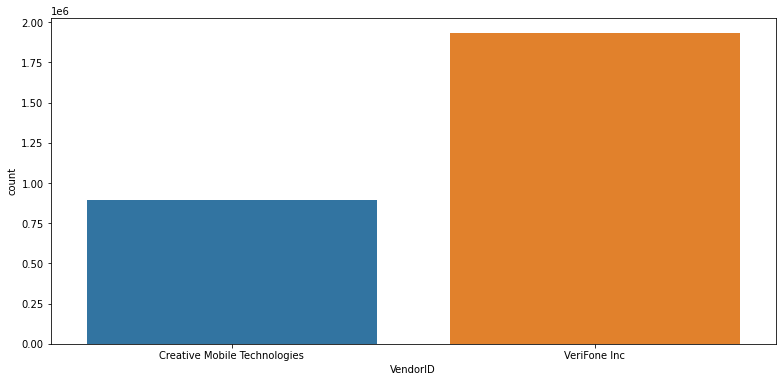

In [80]:
plt.figure(figsize=(13,6))
sns.countplot(x='VendorID', data=df )

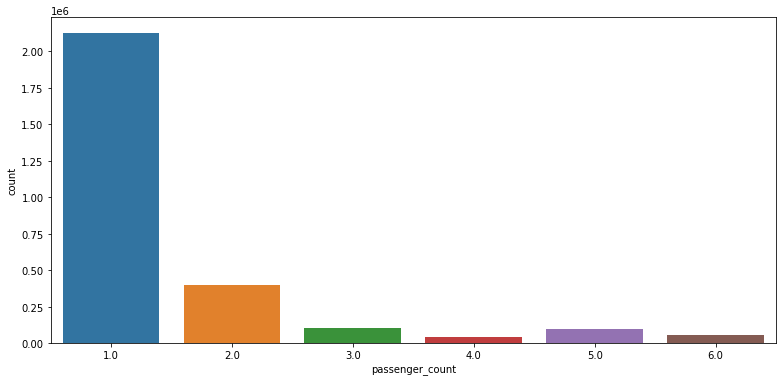

In [81]:
plt.figure(figsize=(13,6))
sns.countplot(x='passenger_count', data=df )

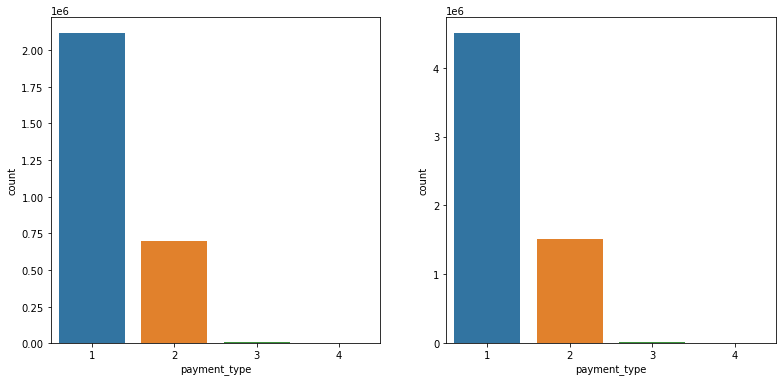

In [82]:
plt.figure(figsize=(13,6))
plt.subplot(1,2,1)
sns.countplot(x='payment_type', data=df )
plt.subplot(1,2,2)
sns.countplot(x='payment_type', data=df2 )

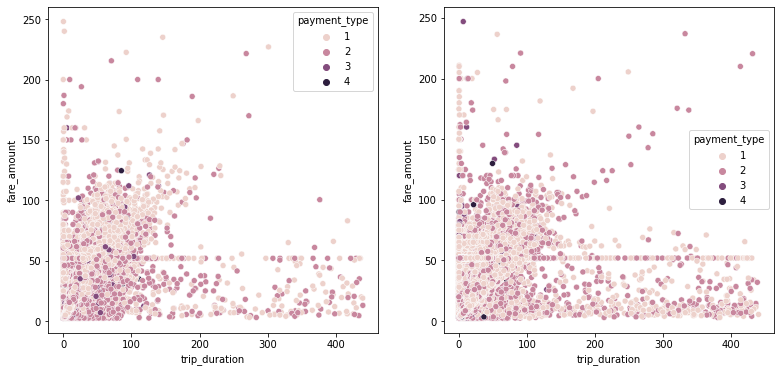

In [83]:
plt.figure(figsize=(13,6))
plt.subplot(1,2,1)
sns.scatterplot(data=df, x="trip_duration", y="fare_amount",hue="payment_type")
plt.subplot(1,2,2)
sns.scatterplot(data=df2, x="trip_duration", y="fare_amount",hue="payment_type")

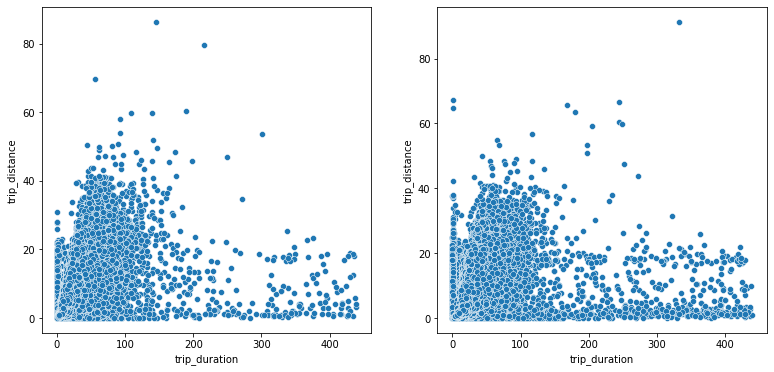

In [84]:
plt.figure(figsize=(13,6))
plt.subplot(1,2,1)
sns.scatterplot(x=df["trip_duration"], y=df["trip_distance"],palette='PuBu')
plt.subplot(1,2,2)
sns.scatterplot(x=df2["trip_duration"], y=df2["trip_distance"],palette='PuBu')

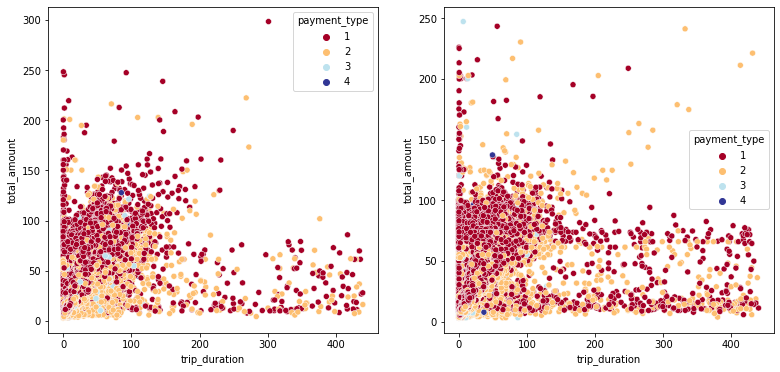

In [85]:
plt.figure(figsize=(13,6))
plt.subplot(1,2,1)
sns.scatterplot(data=df, x="trip_duration", y="total_amount",hue="payment_type",palette='RdYlBu')
plt.subplot(1,2,2)
sns.scatterplot(data=df2, x="trip_duration", y="total_amount",hue="payment_type",palette='RdYlBu')

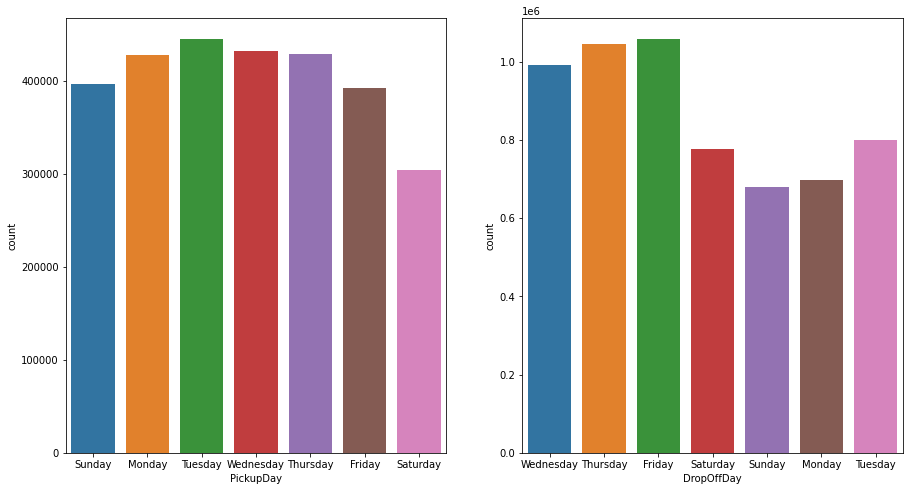

In [86]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.countplot(x='PickupDay', data=df )
plt.subplot(1,2,2)
sns.countplot(x='DropOffDay', data=df2 )

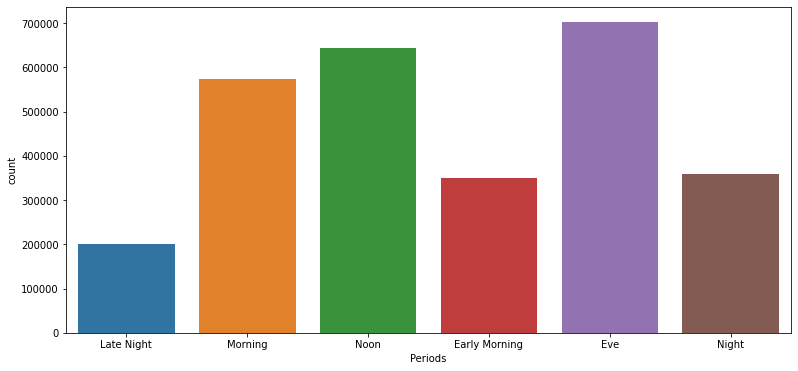

In [87]:
plt.figure(figsize=(13,6))
sns.countplot(x='Periods', data=df )

In [ ]:
from dataprep.eda import plot_diff
plot_diff([df,df2], config={"diff.label": ["March", "January"]})

# Correlation

In [ ]:
plt.figure(figsize=(20,15))
correlation=df.corr()
sns.heatmap(correlation, annot=True,fmt='.2', cmap='YlOrRd')

In [ ]:
import graphviz

In [ ]:
dot1= graphviz.Digraph(comment='trip_duration')
dot1.node('A','trip_duration')
dot1.node('B','tpep_pickup_datetime')
dot1.node('C','tpep_dropoff_datetime')
dot1.edges(['BA','CA'])
print('trip_duration dependencies')
dot1

In [ ]:
dot2= graphviz.Digraph(comment='trip_duration')
dot2.node('A','tpep_pickup_datetime')
dot2.node('B','datehour')
dot2.node('C','PickupDay')
dot2.node('D','Periods')
dot2.edges(['AB','AC','BD'])
print('Periods and PickupDay dependencies')
dot2

# TensorFlow Data Validation

In [ ]:
import tensorflow_data_validation as tfdv

In [ ]:
visualization= tfdv.generate_statistics_from_dataframe(df)
tfdv.visualize_statistics(visualization)

In [ ]:
visualization= tfdv.generate_statistics_from_dataframe(df2)
tfdv.visualize_statistics(visualization)